In [1]:
import os
import numpy as np
import pandas as pd
import cv2
from sklearn.metrics import confusion_matrix, roc_curve,auc, classification_report, precision_score, recall_score
import matplotlib.pyplot as plt

import seaborn as sns
import tensorflow as tf
import torchvision
import torchvision.transfol as F
device_name = tf.test.gprms as transforms
import torch.nn.functionau_device_name()
if device_name != '/device:GPU:0':
    raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Loading Dataset

In [3]:
labels = ['NORMAL', 'PNEUMONIA', 'VIRAL']
img_size = 150
def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))     # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
transform = transforms.Compose(
    [transforms.Resize(224),
     transforms.CenterCrop(224),
     transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train = torchvision.datasets.ImageFolder('/content/drive/MyDrive/ChestXray/chest_xray/train')
test = torchvision.datasets.ImageFolder('/content/drive/MyDrive/ChestXray/chest_xray/test')
val = torchvision.datasets.ImageFolder('/content/drive/MyDrive/ChestXray/chest_xray/val')

In [5]:
pneumonia = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/PNEUMONIA")
pneumonia_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/PNEUMONIA"

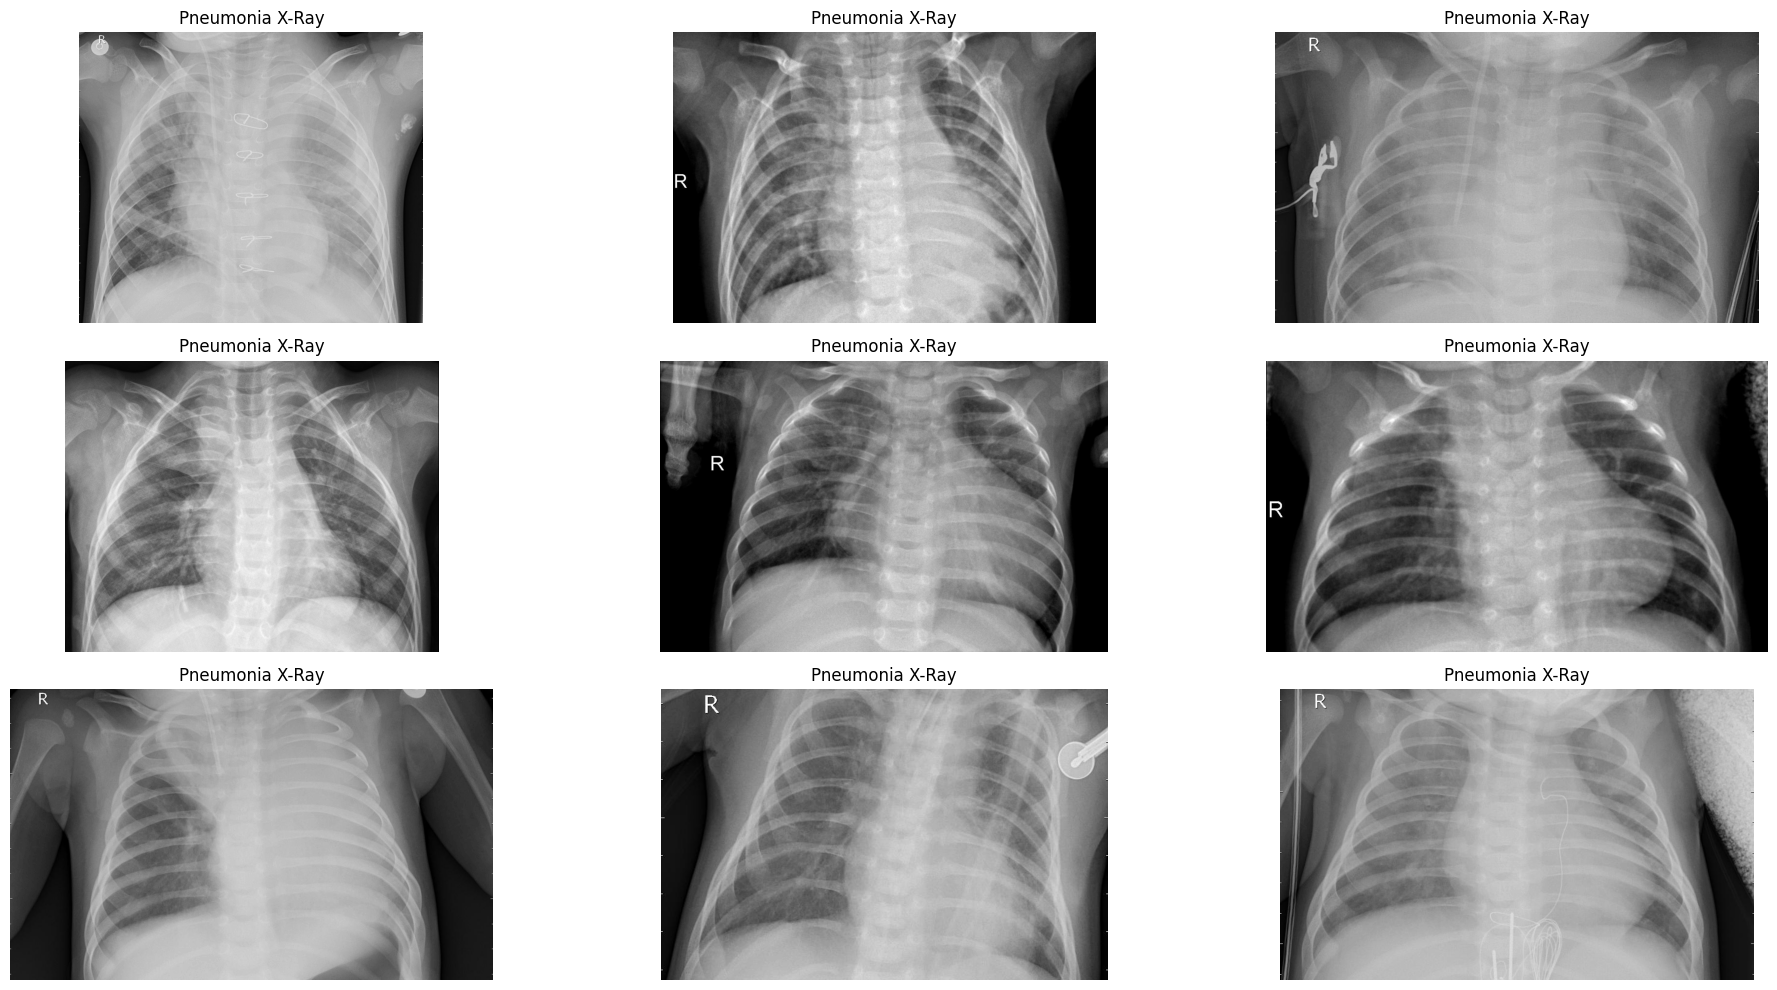

In [6]:
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_dir, pneumonia[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()
#plt.savefig("outputs/pneumonia_xray_images.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

In [7]:
normal = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/NORMAL")
normal_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/NORMAL"

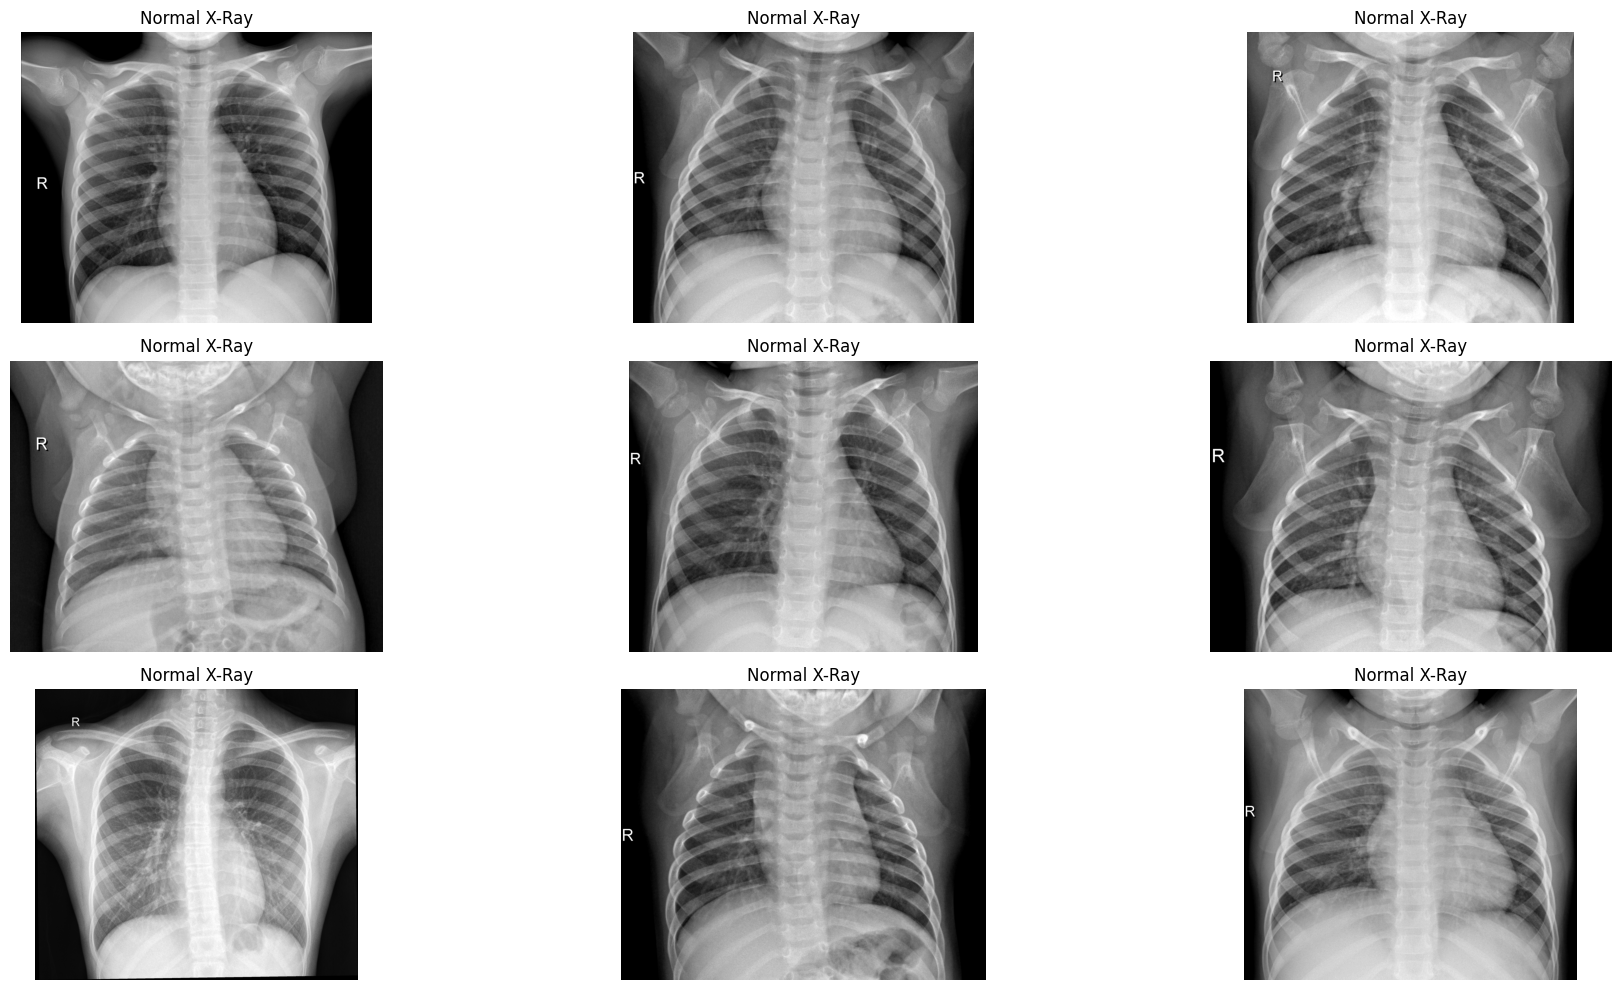

In [8]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_dir, normal[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray")

plt.tight_layout()

In [9]:
viral = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/VIRAL")
viral_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/VIRAL"

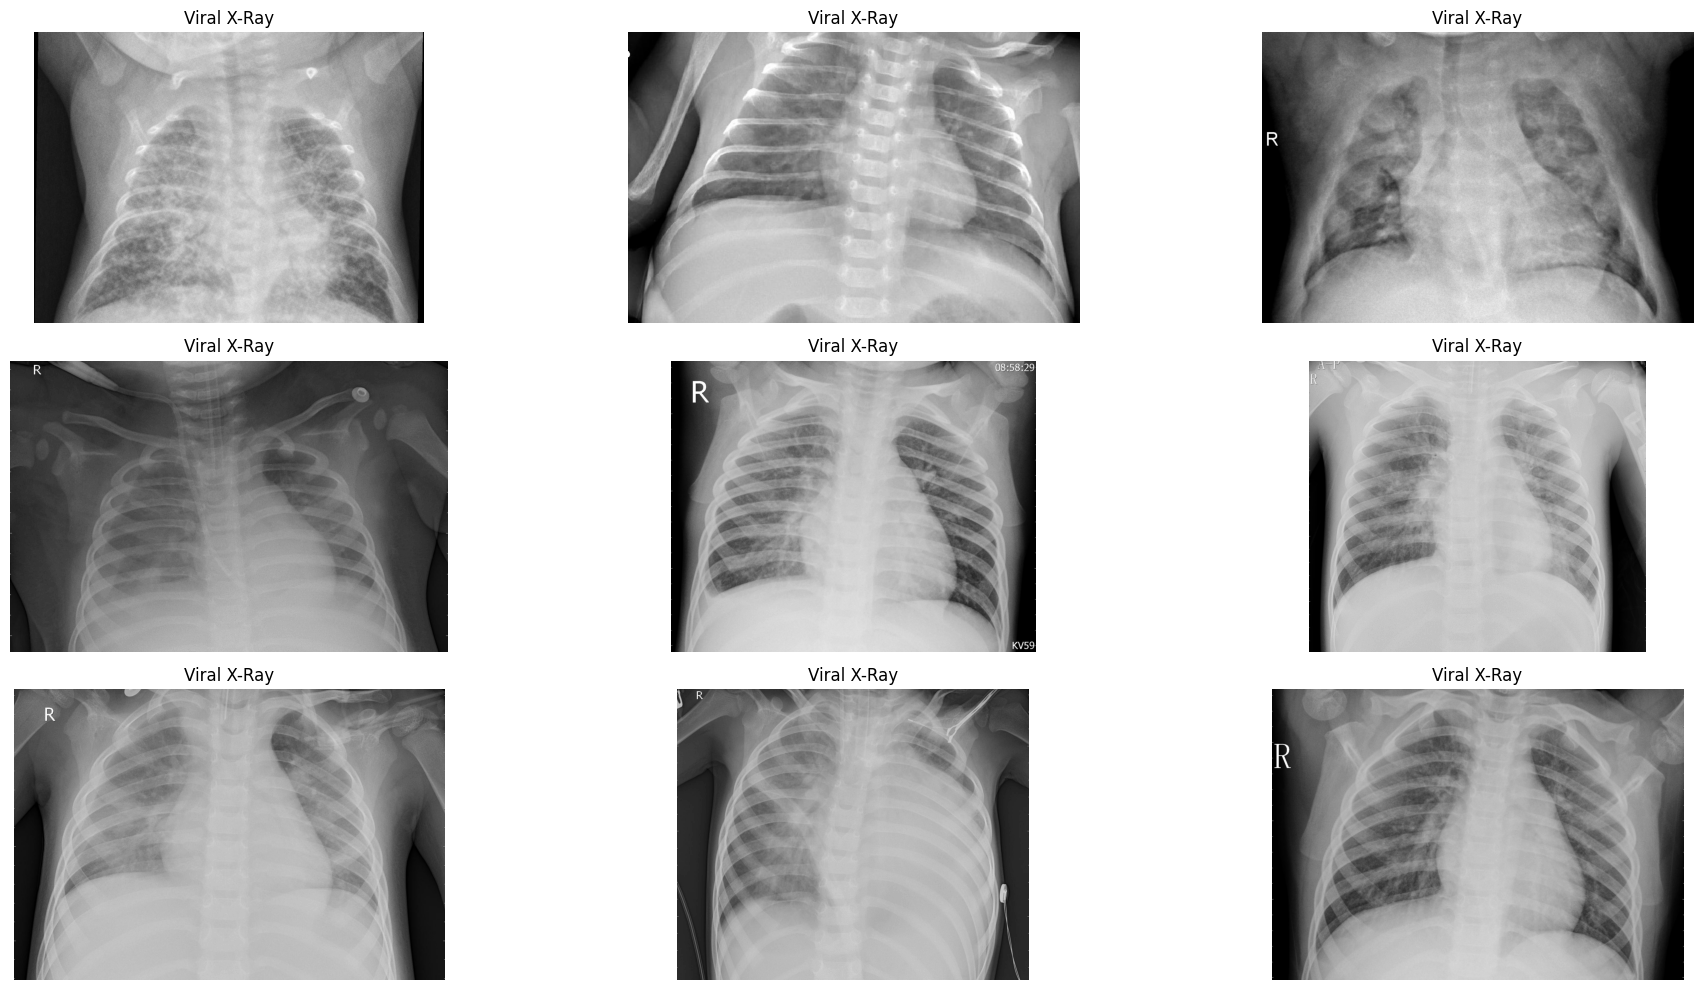

In [10]:
plt.figure(figsize=(20, 10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(viral_dir, viral[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Viral X-Ray")

plt.tight_layout()

Text(0.5, 1.0, 'Pneumonia')

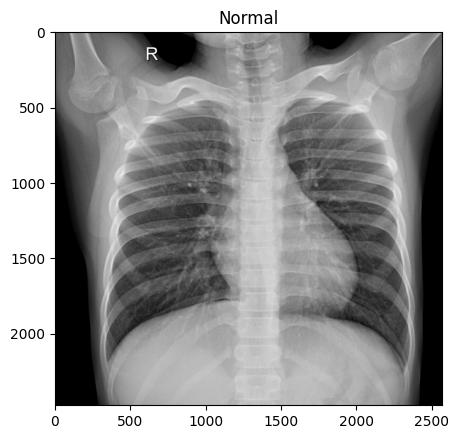

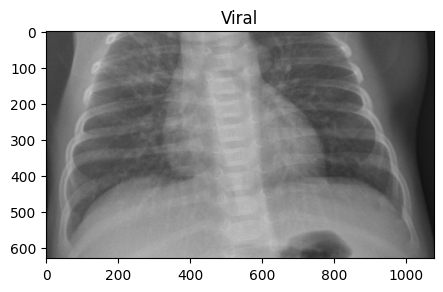

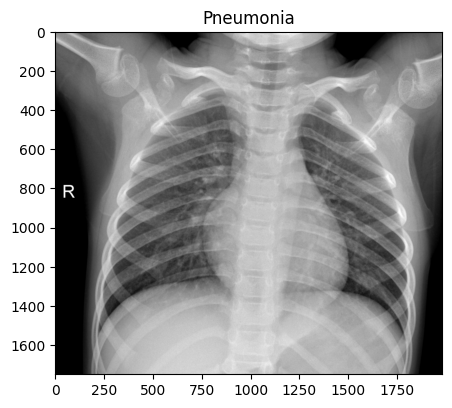

In [11]:
plt.figure(figsize = (5,5))
plt.imshow(train[0][0], cmap='gray')
plt.title("Normal")

plt.figure(figsize = (5,5))
plt.imshow(train[-1][0], cmap='gray')
plt.title("Viral")

plt.figure(figsize = (5,5))
plt.imshow(train[1][0], cmap='gray')
plt.title("Pneumonia")

In [12]:
train_dir = '/content/drive/MyDrive/ChestXray/chest_xray/train/'
test_dir = '/content/drive/MyDrive/ChestXray/chest_xray/test/'
valid_dir = "/content/drive/MyDrive/ChestXray/chest_xray/val/"


normal_train = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/NORMAL")
normal_train_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/NORMAL"
normal_val = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/val/NORMAL")
normal_val_dir = "/content/drive/MyDrive/ChestXray/chest_xray/val/NORMAL"
normal_test = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/test/NORMAL")
normal_test_dir = "/content/drive/MyDrive/ChestXray/chest_xray/test/NORMAL"

pneumonia_train = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/PNEUMONIA")
pneumonia_train_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/PNEUMONIA"
pneumonia_val = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/val/PNEUMONIA")
pneumonia_val_dir = "/content/drive/MyDrive/ChestXray/chest_xray/val/PNEUMONIA"
pneumonia_test = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/test/PNEUMONIA")
pneumonia_test_dir = "/content/drive/MyDrive/ChestXray/chest_xray/test/PNEUMONIA"

viral_train = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/train/VIRAL")
viral_train_dir = "/content/drive/MyDrive/ChestXray/chest_xray/train/VIRAL"
viral_val = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/val/VIRAL")
viral_val_dir = "/content/drive/MyDrive/ChestXray/chest_xray/val/VIRAL"
viral_test = os.listdir("/content/drive/MyDrive/ChestXray/chest_xray/test/VIRAL")
viral_test_dir = "/content/drive/MyDrive/ChestXray/chest_xray/test/VIRAL"


In [13]:
print("{} Pneumonia training images:".format(len(os.listdir(pneumonia_train_dir))))
print("{} Normal training images:".format(len(os.listdir(normal_train_dir))))
print("{} Viral training images:".format(len(os.listdir(viral_train_dir))))
print(" {} Pneumonia valid images:".format(len(os.listdir(pneumonia_val_dir))))
print(" {} Normal valid images:".format(len(os.listdir(normal_val_dir))))
print(" {} Viral valid images:".format(len(os.listdir(viral_val_dir))))
print(" {} Infected testing images:".format(len(os.listdir(pneumonia_test_dir))))
print(" {} Normal testing images:".format(len(os.listdir(normal_test_dir))))
print(" {} Viral testing images:".format(len(os.listdir(viral_test_dir))))


2539 Pneumonia training images:
1349 Normal training images:
1345 Viral training images:
 1 Pneumonia valid images:
 1 Normal valid images:
 1 Viral valid images:
 242 Infected testing images:
 235 Normal testing images:
 148 Viral testing images:


In [14]:
# Train
pneumonia_trn_fpaths = [os.path.join(pneumonia_train_dir, fpath) for fpath in os.listdir(pneumonia_train_dir)]
viral_trn_fpaths = [os.path.join(viral_train_dir, fpath) for fpath in os.listdir(viral_train_dir)]
healthy_trn_fpaths = [os.path.join(normal_train_dir, fpath) for fpath in os.listdir(normal_train_dir)]

# Valid
pneumonia_valid_fpaths = [os.path.join(pneumonia_val_dir, fpath) for fpath in os.listdir(pneumonia_val_dir)]
viral_valid_fpaths = [os.path.join(viral_val_dir, fpath) for fpath in os.listdir(viral_val_dir)]
healthy_valid_fpaths = [os.path.join(normal_val_dir, fpath) for fpath in os.listdir(normal_val_dir)]

# Test
pneumonia_test_fpaths = [os.path.join(pneumonia_test_dir, fpath) for fpath in os.listdir(pneumonia_test_dir)]
viral_test_fpaths = [os.path.join(viral_test_dir, fpath) for fpath in os.listdir(viral_test_dir)]
healthy_test_fpaths = [os.path.join(normal_test_dir, fpath) for fpath in os.listdir(normal_test_dir)]

In [15]:
import random
pneumonia_trn_samples = random.sample(pneumonia_trn_fpaths, 5)
healthy_trn_samples = random.sample(healthy_trn_fpaths, 5)
viral_trn_samples = random.sample(viral_trn_fpaths, 5)

# Investigating a single image from the Dataset

Image name = NORMAL-11419-0001.jpeg
The dimensions are 1183 pixels height and 1522 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 16.0178
The standard deviation is 9.1974


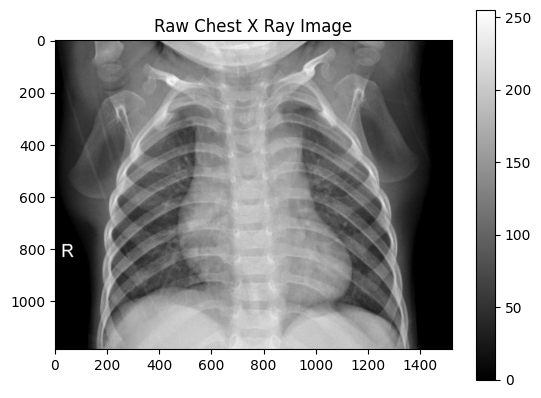

In [40]:
image = load_image("/content/drive/MyDrive/ChestXray/chest_xray/val/NORMAL")
plt.imshow(image, cmap='gray')
plt.colorbar()
plt.title('Raw Chest X Ray Image')
print(f"The dimensions are {image.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image.max():.4f}")
print(f"The minimum pixel value is {image.min():.4f}")
mean = image.mean()/7
std= image.std()/7
print(f"The mean value of the pixels is {mean:.4f}")
print(f"The standard deviation is {std:.4f}")

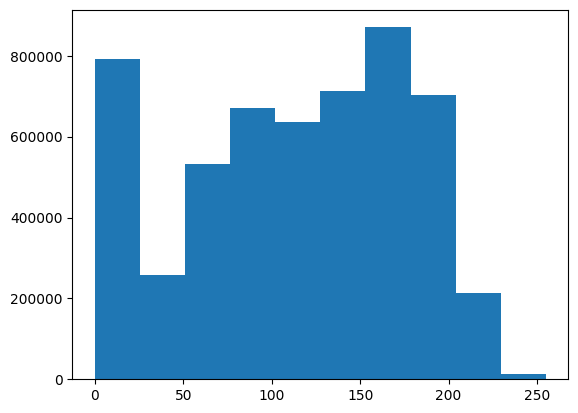

In [30]:
plt.hist(image.ravel())
plt.show()

# Enhancement

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_train_n = '/content/drive/MyDrive/ChestXray/chest_xray/train/NORMAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/NORMAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_train_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_train_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_train_v = '/content/drive/MyDrive/ChestXray/chest_xray/train/VIRAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/VIRAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_train_v):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_train_v, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_train_p = '/content/drive/MyDrive/ChestXray/chest_xray/train/PNEUMONIA/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/PNEUMONIA'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_train_p):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_train_p, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_test_n = '/content/drive/MyDrive/ChestXray/chest_xray/test/NORMAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/test/NORMAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_test_n = '/content/drive/MyDrive/ChestXray/chest_xray/test/PNEUMONIA/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/test/PNEUMONIA'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_test_n = '/content/drive/MyDrive/ChestXray/chest_xray/test/VIRAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/test/VIRAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_val_n = '/content/drive/MyDrive/ChestXray/chest_xray/val/NORMAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/val/NORMAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_val_p = '/content/drive/MyDrive/ChestXray/chest_xray/val/PNEUMONIA/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/val/PNEUMONIA'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

In [ ]:
import os
import cv2

# Set the directory path containing the input images
input_dir_val_v = '/content/drive/MyDrive/ChestXray/chest_xray/val/VIRAL/'

# Set the directory path where the enhanced images will be saved

output_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/val/VIRAL'

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Create a CLAHE object with desired parameters
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))

# Loop through all images in the input directory
for filename in os.listdir(input_dir_test_n):
    if filename.endswith('.jpg') or filename.endswith('.jpeg') or filename.endswith('.png'):
        # Load the image
        img = cv2.imread(os.path.join(input_dir_test_n, filename))

        # Convert to grayscale
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        # Apply CLAHE to the grayscale image
        enhanced = clahe.apply(gray)

        # Save the enhanced image to the output directory
        cv2.imwrite(os.path.join(output_dir, filename), enhanced)

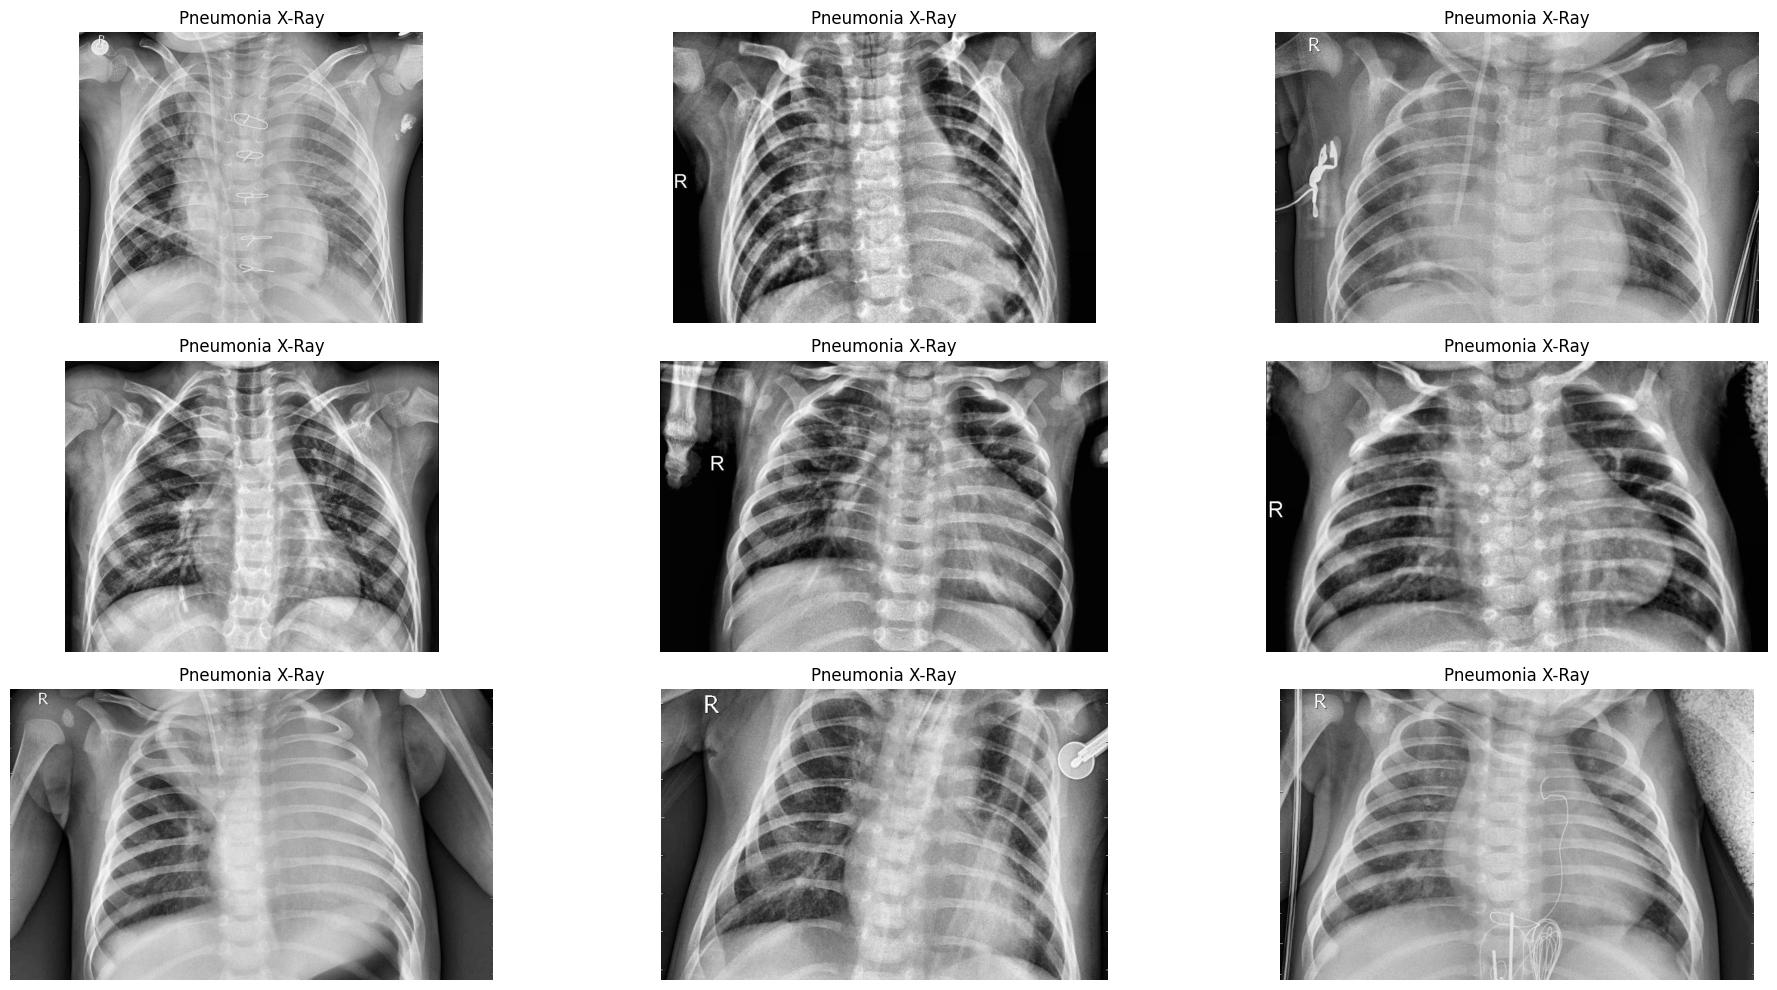

In [ ]:
pneumonia_e = os.listdir('/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/PNEUMONIA')
pneumonia_e_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/PNEUMONIA'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(pneumonia_e_dir, pneumonia_e[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()
#plt.savefig("outputs/pneumonia_xray_images.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

normal_e = os.listdir('/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/NORMAL')
normal_e_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/NORMAL'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(normal_e_dir, normal_e[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Normal X-Ray")
plt.tight_layout()
#plt.savefig("outputs/pneumonia_xray_images.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

viral_e = os.listdir('/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/VIRAL')
viral_e_dir = '/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/train/VIRAL'
plt.figure(figsize = (20,10))

for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(viral_e_dir, viral_e[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    plt.title("Pneumonia X-Ray")
plt.tight_layout()
#plt.savefig("outputs/pneumonia_xray_images.jpeg", format='jpeg', dpi=400, bbox_inches='tight')

# Investigating Image after enhancing the image

Image name = NORMAL-11419-0001.jpeg
The dimensions are 1183 pixels height and 1522 pixels width
The maximum pixel value is 255.0000
The minimum pixel value is 0.0000
The mean value of the pixels is 112.1246
The standard deviation is 64.3821


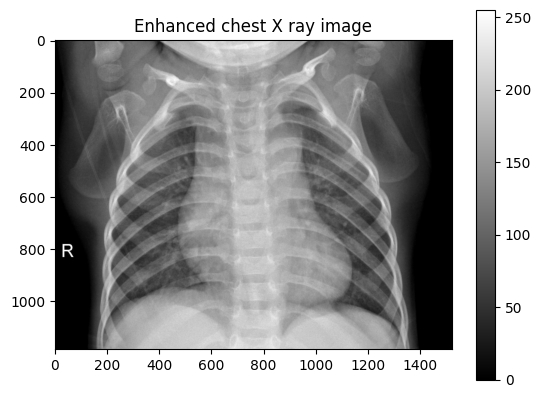

In [31]:
image2 = load_image("/content/drive/MyDrive/ChestXray/chest_xray/Enhanced/val/NORMAL")
plt.imshow(image2, cmap='gray')
plt.colorbar()
plt.title('Enhanced chest X ray image')
print(f"The dimensions are {image2.shape[0]} pixels height and {image.shape[1]} pixels width")
print(f"The maximum pixel value is {image2.max():.4f}")
print(f"The minimum pixel value is {image2.min():.4f}")
print(f"The mean value of the pixels is {image2.mean():.4f}")
print(f"The standard deviation is {image2.std():.4f}")

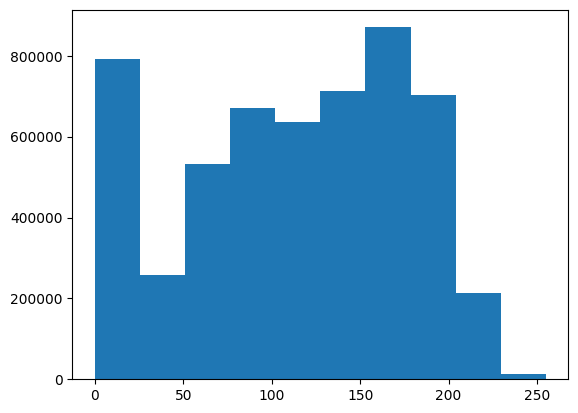

In [29]:
plt.hist(image2.ravel())
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255.,
                                   horizontal_flip=0.4,
                                   vertical_flip=0.4,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   width_shift_range=0.4,
                                   height_shift_range=0.4,
                                   fill_mode='nearest')
valid_datagen = ImageDataGenerator(rescale=1.0/255.)
test_datagen = ImageDataGenerator(rescale=1.0/255.)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    target_size=(128,128),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')
test_generator = test_datagen.flow_from_directory(test_dir,
                                                    batch_size=32,
                                                    target_size=(128,128),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')

valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    batch_size=32,
                                                    target_size=(128, 128),
                                                    class_mode='categorical',
                                                    shuffle=True,
                                                    seed=42,
                                                    color_mode='rgb')
class_labels = train_generator.class_indices
class_names = {value:key for (key, value) in class_labels.items()}
class_labels, class_names

Found 5232 images belonging to 3 classes.
Found 624 images belonging to 3 classes.
Found 3 images belonging to 3 classes.


({'NORMAL': 0, 'PNEUMONIA': 1, 'VIRAL': 2},
 {0: 'NORMAL', 1: 'PNEUMONIA', 2: 'VIRAL'})

In [ ]:
from tensorflow.keras.layers import Input, Flatten, Dense, MaxPooling2D, Conv2D, Dropout
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
# Instantiate VGG19 model with weights from Imagenet without the calssifier at the top
base_model = VGG19(input_shape = (128,128,3),
                   include_top = False,
                   weights = 'imagenet')
# Freeze the ConvNet to avoid weight updates
for layer in base_model.layers:
    layer.trainable=False

x = base_model.output
flat=Flatten()(x)

# Add a classifier -  a fully connected dense layers
class_1 = Dense(4608, activation='relu')(flat)
drop_out = Dropout(0.2)(class_1)
class_2 = Dense(1152, activation='relu')(drop_out)
output = Dense(2, activation='softmax')(class_2)

# Bake a model
model_01 = Model(base_model.inputs, output)
model_01.summary()

# Call backs
filepath = 'models/pneumonia.h5'
es = EarlyStopping(monitor='val_loss', verbose=1, mode='min', patience=4)
cp = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True,
                     save_weights_only=False, mode='auto', save_freq='epoch')
lrr = ReduceLROnPlateau(monitor='val_accuracy',patience=3,verbose=1,factor=0.5,min_lr=0.0001)

# Define an optimizer
sgd = SGD(learning_rate=.0001, momentum=0.9, nesterov=True)

# Compile the model
model_01.compile(loss="binary_crossentropy", optimizer=sgd, metrics=["accuracy"])

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   

In [ ]:
# Fit the model on the training set and train for 5 epochs
history_01 = model_01.fit(train_generator,
                          steps_per_epoch=50,
                          epochs=5,
                          callbacks = [es, cp, lrr],
                          validation_data = valid_generator)

InvalidArgumentError: ignored